In [47]:
import pandas as pd
data = pd.read_csv('Real_Estate.csv')

# display the first few rows
data_head = data.head()

print(data_head)

             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144   
2  2012-09-05 01:10:52.349449        1.1                            1978.6710   
3  2012-09-05 13:26:01.189083       22.2                            1055.0670   
4  2012-09-06 08:29:47.910523        8.5                             967.4000   

   Number of convenience stores   Latitude   Longitude  \
0                             8  25.007059  121.561694   
1                             2  25.012148  121.546990   
2                            10  25.003850  121.528336   
3                             5  24.962887  121.482178   
4                             6  25.011037  121.479946   

   House price of unit area  
0                  6.488673  
1                 24.970725  
2                 26.694267  
3                 38.091638  
4             

In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 21.1+ KB
None


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime

# convert "Transaction date" to datetime and extract year and month
data['Transaction date'] = pd.to_datetime(data['Transaction date'])
data['Transaction year'] = data['Transaction date'].dt.year
data['Transaction month'] = data['Transaction date'].dt.month

# drop the original "Transaction date" as we've extracted relevant features
data = data.drop(columns=['Transaction date'])

# define features and target variable
X = data.drop('House price of unit area', axis=1)
y = data['House price of unit area']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape #This by MrAman Kharwal

(331, 7)

In [6]:
X_test_scaled.shape

(83, 7)

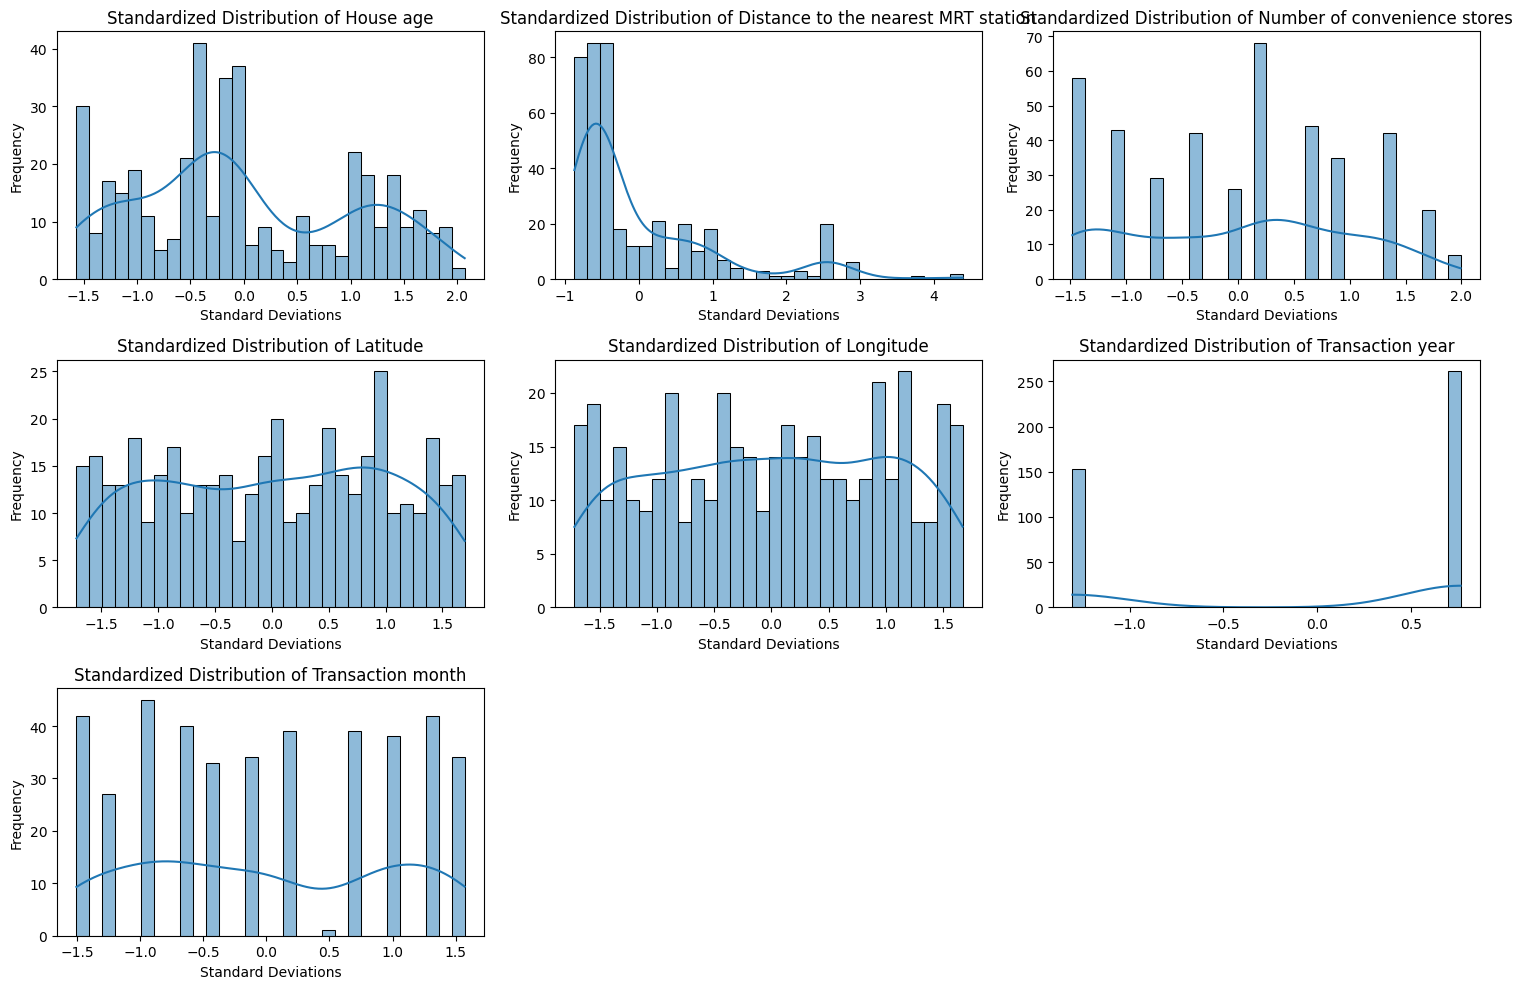

In [11]:
%pip install Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have your original data in 'data'
features = data.drop('House price of unit area', axis=1)  # Exclude the target variable
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Convert the standardized features back to a DataFrame
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)

# Plot histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(standardized_df.columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid based on the number of features
    sns.histplot(standardized_df[column], bins=30, kde=True)
    plt.title(f'Standardized Distribution of {column}')
    plt.xlabel('Standard Deviations')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
#1. Standardized Distribution of Feature 1
#Graph Title: Standardized Distribution of Feature 1
#X-axis: Standard Deviations (Z-scores)
#Y-axis: Frequency
#Interpretation:
#The histogram shows how many instances of the data fall within different ranges of standard deviations.
#A bell-shaped curve indicates that the feature is normally distributed, which is ideal for many machine learning models.
#If the distribution is skewed (either left or right), it may affect model performance, and transformation might be needed.
#2. Standardized Distribution of Feature 2
#Graph Title: Standardized Distribution of Feature 2
#Interpretation:
#Similar to Feature 1, you would look for the shape of the distribution.
#If the KDE (Kernel Density Estimate) line closely follows the histogram, it suggests that the distribution is well-modeled by a normal distribution.
##If the distribution is bimodal (two peaks), it might indicate the presence of two different groups within the data.
#3. Standardized Distribution of Feature 3
#Graph Title: Standardized Distribution of Feature 3
#Interpretation:
##Analyze the spread and center of the distribution.
#A wider spread indicates higher variability, while a narrow spread suggests that the data points are closer to the mean.
#If there are many outliers (bars far from the center), you may need to investigate those points further.
#4. Standardized Distribution of Feature 4
#Graph Title: Standardized Distribution of Feature 4
#Interpretation:
#Look for any asymmetry in the histogram.
#A right-skewed distribution indicates that most data points are lower, with a few high values pulling the mean up. In contrast, a left-skewed distribution suggests the opposite.
#Consider how this might impact your modeling choice; some algorithms handle skewness better than others.
#5. Standardized Distribution of Feature 5
#Graph Title: Standardized Distribution of Feature 5
#Interpretation:
#Identify if the distribution has multiple peaks (multimodal), indicating that the data may belong to different clusters or groups.
#Each peak can represent a different category or behavior within the data, which may be crucial for analysis.

In [ ]:
#Normal Distribution: Ideal for linear regression and other parametric models.
#Skewness: Indicates the need for transformation (log, square root, etc.) for better model performance.
#Outliers: Should be investigated as they can heavily influence model predictions and metrics.
#Variability: Understanding how spread out the data is helps in selecting the right machine learning algorithms.

In [26]:
#This code standardizes the features of your dataset (excluding the target variable), 
#visualizes their distributions in a series of histograms, and provides insights 
#into how the features are distributed relative to standard deviations. 
#Each histogram helps to understand the shape and spread of the standardized data, which can be useful for subsequent modeling steps.

In [31]:
#By analyzing each graph, you can gain insights into how well each feature behaves after standardization and 
#how they might interact with each other in a machine learning context. 
#Identifying distribution shapes, skews, 
#and outliers will guide your feature engineering and selection processes in subsequent modeling tasks. 
#If you have the specific feature names, I can provide more tailored interpretations for each one!

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# dictionary to hold the evaluation metrics for each model
results = {}

# train and evaluate each model
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)

    # making predictions on the test set
    predictions = model.predict(X_test_scaled)

    # calculating evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # storing the metrics
    results[name] = {"MAE": mae, "R²": r2}

results_df = pd.DataFrame(results).T  # convert the results to a DataFrame for better readability
print(results_df) #this code by Mr.Aman Kharwal

                         MAE        R²
Linear Regression   9.748246  0.529615
Decision Tree      11.760342  0.204962
Random Forest       9.887601  0.509547
Gradient Boosting  10.000117  0.476071


                         MAE        R²
Linear Regression   9.748246  0.529615
Decision Tree      11.760342  0.204962
Random Forest       9.887601  0.509547
Gradient Boosting  10.000117  0.476071


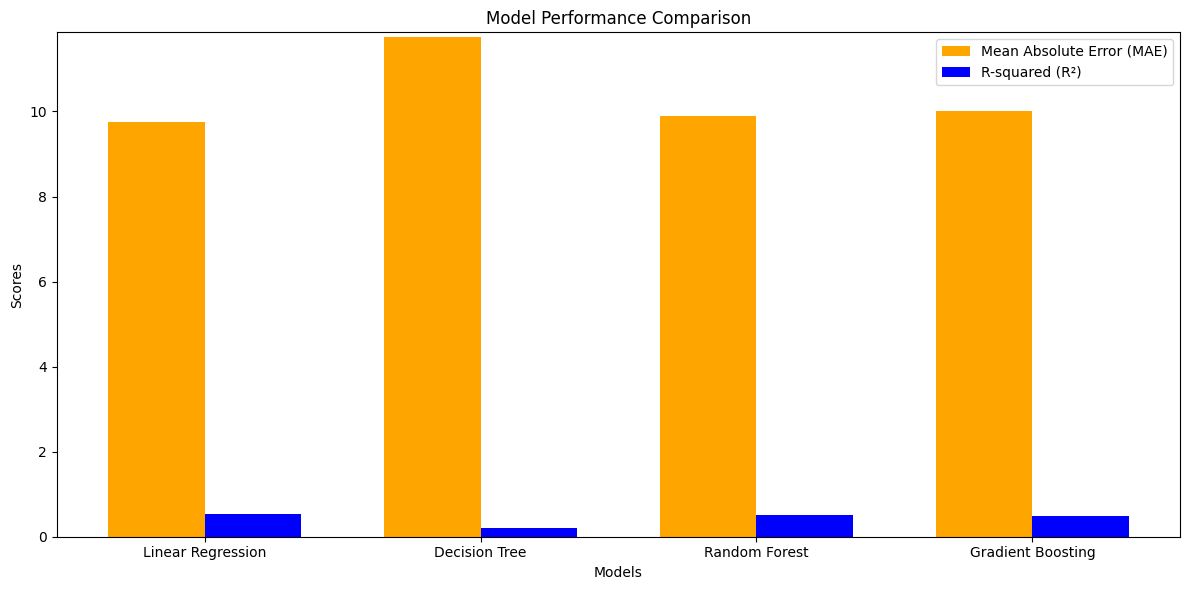

In [14]:
# Assuming results is structured as follows:
# results = {'Linear Regression': {'MAE': value, 'R²': value}, ...}

# Create DataFrame from the results dictionary
results_df = pd.DataFrame(results).T  # Transpose for better readability
print(results_df)  # Check the DataFrame structure

# Access the correct columns for plotting
metrics_df = results_df  # No need to transpose again
models = metrics_df.index
mae_values = metrics_df['MAE'].values  # Use .values to avoid KeyError
r2_values = metrics_df['R²'].values

# Set the bar width and positions
bar_width = 0.35
x = np.arange(len(models))

# Create bar plots
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, mae_values, bar_width, label='Mean Absolute Error (MAE)', color='orange')
plt.bar(x + bar_width/2, r2_values, bar_width, label='R-squared (R²)', color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, max(mae_values.max(), r2_values.max()) + 0.1)  # Adjust y-axis limit for better view

# Show plot
plt.tight_layout()
plt.show()


In [22]:
#This graph is an effective tool for evaluating and presenting the performance of multiple regression models based on specific metrics. 
#By using both MAE and R², you can gain a comprehensive understanding of how well each model is likely to perform in practical applications. 

In [ ]:
#The graph compares the performance of different regression models using two metrics: Mean Absolute Error (MAE) and R-squared (R²).

#Key Points:
#X-axis: Represents different regression models (e.g., Linear Regression, Decision Tree).
#Y-axis: Shows the scores for MAE and R².
#Orange Bars (MAE): Indicate prediction errors; lower values are better.
#Blue Bars (R²): Measure how well the model explains variance; higher values (closer to 1) are better.
#Interpretation:
#Models with lower MAE and higher R² are preferred, indicating better performance.
#This visualization provides a quick comparison to identify the best-performing model among the tested algorithms.

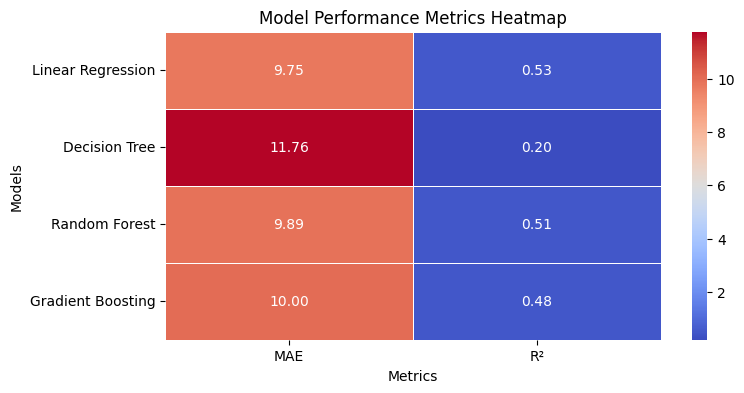

In [15]:
import seaborn as sns

# Create a heatmap for the results
plt.figure(figsize=(8, 4))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Model Performance Metrics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()


In [35]:
#What It Shows:
#The heatmap visually represents the performance metrics of various models in your analysis (e.g., Linear Regression, Random Forest, etc.).
#Each cell in the heatmap corresponds to a model and a metric, displaying the value of that metric (like MAE or R²) for the respective model.
#Color Interpretation:
#Color Intensity: The colors in the heatmap indicate the relative performance of the models on the specified metrics:
#Cool Colors (Blue): Represent lower metric values (indicating better performance for metrics like MAE or lower scores).
#Warm Colors (Red): Represent higher metric values (indicating worse performance for metrics like MAE).
#Insights Gained:
#Model Comparison: You can quickly assess which models perform better or worse based on the color coding and the values shown in the cells.
#Metric Evaluation: By reviewing the heatmap, you can identify which models have the best trade-off between different performance metrics (e.g., lower MAE with a good R²).
#Decision-Making: This visualization aids in making decisions about which models to select for further analysis or deployment based on their performance.
#Conclusion
#The heatmap is a powerful visual tool that summarizes the performance of multiple models across various metrics in a clear and concise manner.
#By interpreting the color intensity and the numerical values, you can make informed decisions about model selection and performance evaluation.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models as a dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

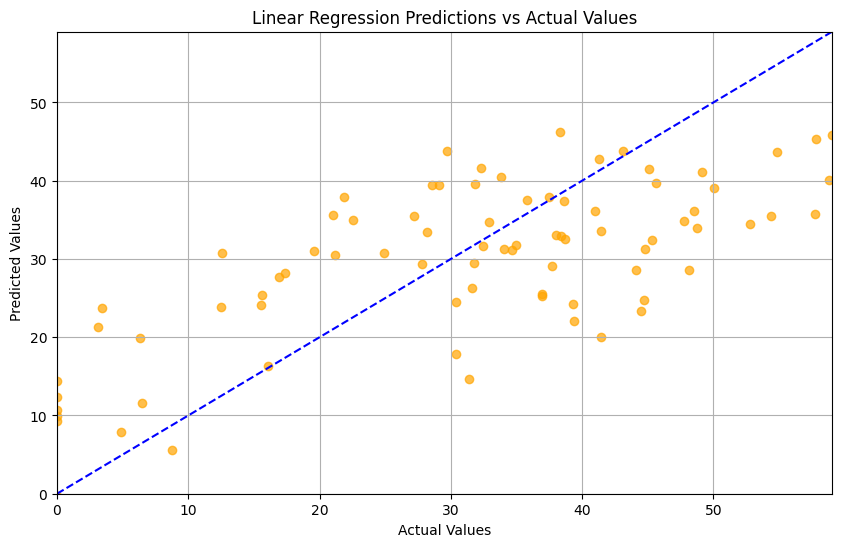

In [21]:
import matplotlib.pyplot as plt
import pandas as pd  # Make sure pandas is imported if you're working with DataFrames

# Define the models again if needed
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train all models if they haven't been trained yet
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Choose the Linear Regression model
chosen_model = models["Linear Regression"]

# Make predictions on the test set
predictions = chosen_model.predict(X_test_scaled)

# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='orange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')  # Ideal line
plt.title('Linear Regression Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()

In [36]:
#Purpose: The scatter plot is used to visually assess the performance of the Linear Regression model by comparing the predicted values against the actual values.
#Interpretation:
#Each point on the scatter plot represents a data point from the test set, with its actual value plotted on the x-axis and the predicted value plotted on the y-axis.
#If the model is perfect, all points would lie on the ideal dashed line. Points above this line indicate under-predictions (actual > predicted), while points below indicate over-predictions (actual < predicted).
#Assessment of Model Performance:
#The closer the points are to the ideal line, the better the model's predictions are.
#A scatter plot that shows a pattern (like a curve) rather than a random distribution might indicate that the model is not capturing the relationships in the data properly.
#Conclusion
#This scatter plot provides a clear visual representation of how well the Linear Regression model has performed, helping to identify any discrepancies between predicted and actual values and allowing for a quick assessment of the model's predictive accuracy.